# PANDAS TUTORIAL (QUICK TOUR-10 MINUTES)

This is a short introduction to `pandas`, geared mainly for new users.

Customarily, we import as follow:

In [1]:
import numpy as np
import pandas as pd

## Object Creation

Creating a **Series** by passing a list of values, letting `pandas` create a default integer index.

In [2]:
s = pd.Series([1, 2, -7, 10, np.nan, 8, 11])
s

0     1.0
1     2.0
2    -7.0
3    10.0
4     NaN
5     8.0
6    11.0
dtype: float64

Creating a **DataFrame** by passing a `NumPy` array, with datetime index and labeled columns.

In [3]:
dates = pd.date_range("20220319", periods=7)
dates

DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(7, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2022-03-19,0.228181,0.411725,-0.888684,-0.907902
2022-03-20,-1.676719,1.090258,-1.966077,0.909066
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163
2022-03-22,1.776478,0.235238,-0.093981,0.867664
2022-03-23,-0.185076,-0.964747,-0.542850,-0.283645
2022-03-24,-0.216682,0.182571,0.885816,-0.151794
2022-03-25,0.624784,-0.974044,1.100455,0.893449


Create a **DataFrame** by passing a *dictionary* of objects that can be converted into a series-like structure.

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.5,
        "B": pd.Timestamp("20220319"),
        "C": pd.Series(1, index=list(range(4)), dtype=np.float32),
        "D": np.array([5] * 4, dtype=np.int32),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.5,2022-03-19,1.0,5,test,foo
1,1.5,2022-03-19,1.0,5,train,foo
2,1.5,2022-03-19,1.0,5,test,foo
3,1.5,2022-03-19,1.0,5,train,foo


The columns of the resulting **DataFrame** have different `dtypes`.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

Here is how to view the top and bottom rows of the frame.

In [7]:
df.head()

,A,B,C,D
2022-03-19,0.228181,0.411725,-0.888684,-0.907902
2022-03-20,-1.676719,1.090258,-1.966077,0.909066
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163
2022-03-22,1.776478,0.235238,-0.093981,0.867664
2022-03-23,-0.185076,-0.964747,-0.542850,-0.283645


In [8]:
df.tail()

,A,B,C,D
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163
2022-03-22,1.776478,0.235238,-0.093981,0.867664
2022-03-23,-0.185076,-0.964747,-0.542850,-0.283645
2022-03-24,-0.216682,0.182571,0.885816,-0.151794
2022-03-25,0.624784,-0.974044,1.100455,0.893449


> You can pass arguments to the `head()` or `tail()` functions to display a specified number of rows.

In [9]:
df.head(2)

,A,B,C,D
2022-03-19,0.228181,0.411725,-0.888684,-0.907902
2022-03-20,-1.676719,1.090258,-1.966077,0.909066


Display the index, columns.

In [10]:
df.index

DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

> `DataFrame.to_numpy()` gives a `NumPy` representation of the underlying data. Note that this can be an expensive operation when your `DataFrame` has columns with *different* data types, which comes down to a fundamental difference between pandas and `NumPy`: `NumPy` arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call `DataFrame.to_numpy()`, pandas will find the `NumPy` dtype that can hold all of the dtypes in the `DataFrame`. This may end up being object, which requires casting every value to a Python object.

For `df`, our **DataFrame** of all floating-point values, `DataFrame.to_numpy()` is fast and doesn't require copying data

In [12]:
df.to_numpy()

array([[ 0.22818121,  0.41172466, -0.88868392, -0.90790186],
       [-1.67671899,  1.09025807, -1.96607677,  0.90906625],
       [ 0.24424891, -0.2565773 , -0.09908294, -0.16916329],
       [ 1.77647805,  0.23523834, -0.09398143,  0.86766426],
       [-0.18507631, -0.96474687, -0.54284961, -0.28364508],
       [-0.21668238,  0.18257144,  0.88581603, -0.15179394],
       [ 0.62478439, -0.97404414,  1.10045518,  0.893449  ]])

For `df2`, the **DataFrame** with multiply `dtypes`, `DataFrame.to_numpy()` is relative expensive.

In [13]:
df2.to_numpy()

array([[1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'test', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'train', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'test', 'foo'],
       [1.5, Timestamp('2022-03-19 00:00:00'), 1.0, 5, 'train', 'foo']],
      dtype=object)

`describe()` shows a quick statistic summary of your data.

In [14]:
df.describe()

,A,B,C,D
count,7.000000,7.000000,7.000000,7.000000
mean,0.113602,-0.039368,-0.229200,0.165382
std,1.037642,0.750703,1.048530,0.723698
min,-1.676719,-0.974044,-1.966077,-0.907902
25%,-0.200879,-0.610662,-0.715767,-0.226404
50%,0.228181,0.182571,-0.099083,-0.151794
75%,0.434517,0.323481,0.395917,0.880557
max,1.776478,1.090258,1.100455,0.909066


In [15]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.5,1.0,5.0
std,0.0,0.0,0.0
min,1.5,1.0,5.0
25%,1.5,1.0,5.0
50%,1.5,1.0,5.0
75%,1.5,1.0,5.0
max,1.5,1.0,5.0


Transposing your data.

In [16]:
df.T

,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25
A,0.228181,-1.676719,0.244249,1.776478,-0.185076,-0.216682,0.624784
B,0.411725,1.090258,-0.256577,0.235238,-0.964747,0.182571,-0.974044
C,-0.888684,-1.966077,-0.099083,-0.093981,-0.542850,0.885816,1.100455
D,-0.907902,0.909066,-0.169163,0.867664,-0.283645,-0.151794,0.893449


Sorting by an **axis**

In [17]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2022-03-25,0.624784,-0.974044,1.100455,0.893449
2022-03-24,-0.216682,0.182571,0.885816,-0.151794
2022-03-23,-0.185076,-0.964747,-0.542850,-0.283645
2022-03-22,1.776478,0.235238,-0.093981,0.867664
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163
2022-03-20,-1.676719,1.090258,-1.966077,0.909066
2022-03-19,0.228181,0.411725,-0.888684,-0.907902


In [18]:
df.sort_index(axis=1, ascending=False)


,D,C,B,A
2022-03-19,-0.907902,-0.888684,0.411725,0.228181
2022-03-20,0.909066,-1.966077,1.090258,-1.676719
2022-03-21,-0.169163,-0.099083,-0.256577,0.244249
2022-03-22,0.867664,-0.093981,0.235238,1.776478
2022-03-23,-0.283645,-0.542850,-0.964747,-0.185076
2022-03-24,-0.151794,0.885816,0.182571,-0.216682
2022-03-25,0.893449,1.100455,-0.974044,0.624784


Sorting by values.

In [19]:
df.sort_values(by="B")

,A,B,C,D
2022-03-25,0.624784,-0.974044,1.100455,0.893449
2022-03-23,-0.185076,-0.964747,-0.542850,-0.283645
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163
2022-03-24,-0.216682,0.182571,0.885816,-0.151794
2022-03-22,1.776478,0.235238,-0.093981,0.867664
2022-03-19,0.228181,0.411725,-0.888684,-0.907902
2022-03-20,-1.676719,1.090258,-1.966077,0.909066


## Selection

### Getting

Selecting a single column, which yeild a `Series`, equivalent to `df.A`.

In [20]:
print("df.A", df.A, sep="\n")
print("="*30)
print("df[\"A\"]", df["A"], sep="\n")

df.A
2022-03-19    0.228181
2022-03-20   -1.676719
2022-03-21    0.244249
2022-03-22    1.776478
2022-03-23   -0.185076
2022-03-24   -0.216682
2022-03-25    0.624784
Freq: D, Name: A, dtype: float64
df["A"]
2022-03-19    0.228181
2022-03-20   -1.676719
2022-03-21    0.244249
2022-03-22    1.776478
2022-03-23   -0.185076
2022-03-24   -0.216682
2022-03-25    0.624784
Freq: D, Name: A, dtype: float64


Selecting via `[]`, which slicing the rows.

In [21]:
df[0:3]

,A,B,C,D
2022-03-19,0.228181,0.411725,-0.888684,-0.907902
2022-03-20,-1.676719,1.090258,-1.966077,0.909066
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163


In [22]:
df["20220319":"20220321"]

,A,B,C,D
2022-03-19,0.228181,0.411725,-0.888684,-0.907902
2022-03-20,-1.676719,1.090258,-1.966077,0.909066
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163


## Selection by label

For getting a cross section using a label.

In [23]:
df.loc[dates[0]]

A    0.228181
B    0.411725
C   -0.888684
D   -0.907902
Name: 2022-03-19 00:00:00, dtype: float64

Selecting on a multi-axis by label.

In [24]:
df.loc[:, ["A", "B"]]

,A,B
2022-03-19,0.228181,0.411725
2022-03-20,-1.676719,1.090258
2022-03-21,0.244249,-0.256577
2022-03-22,1.776478,0.235238
2022-03-23,-0.185076,-0.964747
2022-03-24,-0.216682,0.182571
2022-03-25,0.624784,-0.974044


Showing label slicing, both endpoints are included.

In [25]:
df.loc["20220319":"20220321", ["C", "D"]]

,C,D
2022-03-19,-0.888684,-0.907902
2022-03-20,-1.966077,0.909066
2022-03-21,-0.099083,-0.169163


Reduction in the dimensions of returned object.

In [26]:
df.loc["20220324", ["B", "C"]]

B    0.182571
C    0.885816
Name: 2022-03-24 00:00:00, dtype: float64

For getting a scalar value.

In [27]:
df.loc[dates[1], "A"]

-1.6767189854604438

For getting fast access to a scalar (equivalent to the prior method).

In [28]:
df.at[dates[1], "A"]

-1.6767189854604438

## Selection by position

Select via the position of the passed integers.

In [29]:
df.iloc[3]
# equivalent to df.loc[dates[3]]

A    1.776478
B    0.235238
C   -0.093981
D    0.867664
Name: 2022-03-22 00:00:00, dtype: float64

By integer slices, acting similar to `Numpy/Python`.

In [30]:
df.iloc[3:5, 0:2]
# equivalent to df.loc["20220322":"20220323", ["A", "B"]]

,A,B
2022-03-22,1.776478,0.235238
2022-03-23,-0.185076,-0.964747


By list of integer position locations, similar to the `Numpy/Python` style.

In [31]:
df.iloc[[1, 2, 4], [0, 2]]
# equivalent to df.loc["20220320":"20220323", ["B", "C"]]

,A,C
2022-03-20,-1.676719,-1.966077
2022-03-21,0.244249,-0.099083
2022-03-23,-0.185076,-0.542850


For slicing rows explicitly.

In [32]:
df.iloc[1:3, :]

,A,B,C,D
2022-03-20,-1.676719,1.090258,-1.966077,0.909066
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163


For slicing columns explicitly.

In [33]:
df.iloc[:, 1:3]

,B,C
2022-03-19,0.411725,-0.888684
2022-03-20,1.090258,-1.966077
2022-03-21,-0.256577,-0.099083
2022-03-22,0.235238,-0.093981
2022-03-23,-0.964747,-0.542850
2022-03-24,0.182571,0.885816
2022-03-25,-0.974044,1.100455


For getting a value explicitly.

In [34]:
df.iloc[1, 1]

1.0902580667797517

For getting fast access to a scalar (equivalent to the prior method).

In [35]:
df.iat[1, 1]

1.0902580667797517

## Boolean indexing

Using a single column's values to select data.

In [36]:
df[df["A"] > 0]

,A,B,C,D
2022-03-19,0.228181,0.411725,-0.888684,-0.907902
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163
2022-03-22,1.776478,0.235238,-0.093981,0.867664
2022-03-25,0.624784,-0.974044,1.100455,0.893449


Selecting values from a **DataFrame** where a boolean condition is met.

In [37]:
df[df > 0]

,A,B,C,D
2022-03-19,0.228181,0.411725,NaN,NaN
2022-03-20,NaN,1.090258,NaN,0.909066
2022-03-21,0.244249,NaN,NaN,NaN
2022-03-22,1.776478,0.235238,NaN,0.867664
2022-03-23,NaN,NaN,NaN,NaN
2022-03-24,NaN,0.182571,0.885816,NaN
2022-03-25,0.624784,NaN,1.100455,0.893449


Using `isin()` method for filtering.

In [38]:
df_copy = df.copy()
df_copy["E"] = ["one", "two", "three", "four", "five", "six", "seven"]
df_copy

,A,B,C,D,E
2022-03-19,0.228181,0.411725,-0.888684,-0.907902,one
2022-03-20,-1.676719,1.090258,-1.966077,0.909066,two
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163,three
2022-03-22,1.776478,0.235238,-0.093981,0.867664,four
2022-03-23,-0.185076,-0.964747,-0.542850,-0.283645,five
2022-03-24,-0.216682,0.182571,0.885816,-0.151794,six
2022-03-25,0.624784,-0.974044,1.100455,0.893449,seven


In [39]:
df_copy[df_copy["E"].isin(["three", "six"])]

,A,B,C,D,E
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163,three
2022-03-24,-0.216682,0.182571,0.885816,-0.151794,six


## Setting

Setting a new column automatically aligns the data by the indexes.

In [40]:
s1 = pd.Series(list(range(1, 8)), index=pd.date_range("20220319", periods=7))
s1

2022-03-19    1
2022-03-20    2
2022-03-21    3
2022-03-22    4
2022-03-23    5
2022-03-24    6
2022-03-25    7
Freq: D, dtype: int64

In [41]:
df["F"] = s1
df

,A,B,C,D,F
2022-03-19,0.228181,0.411725,-0.888684,-0.907902,1
2022-03-20,-1.676719,1.090258,-1.966077,0.909066,2
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163,3
2022-03-22,1.776478,0.235238,-0.093981,0.867664,4
2022-03-23,-0.185076,-0.964747,-0.542850,-0.283645,5
2022-03-24,-0.216682,0.182571,0.885816,-0.151794,6
2022-03-25,0.624784,-0.974044,1.100455,0.893449,7


Setting values by label.

In [42]:
df.at[dates[0], "A"] = 0
df

,A,B,C,D,F
2022-03-19,0.000000,0.411725,-0.888684,-0.907902,1
2022-03-20,-1.676719,1.090258,-1.966077,0.909066,2
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163,3
2022-03-22,1.776478,0.235238,-0.093981,0.867664,4
2022-03-23,-0.185076,-0.964747,-0.542850,-0.283645,5
2022-03-24,-0.216682,0.182571,0.885816,-0.151794,6
2022-03-25,0.624784,-0.974044,1.100455,0.893449,7


Setting values by position.

In [43]:
df.iat[0, 1] = 1
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-0.888684,-0.907902,1
2022-03-20,-1.676719,1.090258,-1.966077,0.909066,2
2022-03-21,0.244249,-0.256577,-0.099083,-0.169163,3
2022-03-22,1.776478,0.235238,-0.093981,0.867664,4
2022-03-23,-0.185076,-0.964747,-0.542850,-0.283645,5
2022-03-24,-0.216682,0.182571,0.885816,-0.151794,6
2022-03-25,0.624784,-0.974044,1.100455,0.893449,7


Setting by assigning with a `Numpy` array

In [44]:
df.loc[:, "D"] = np.array(5 * len(df))
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-0.888684,35,1
2022-03-20,-1.676719,1.090258,-1.966077,35,2
2022-03-21,0.244249,-0.256577,-0.099083,35,3
2022-03-22,1.776478,0.235238,-0.093981,35,4
2022-03-23,-0.185076,-0.964747,-0.542850,35,5
2022-03-24,-0.216682,0.182571,0.885816,35,6
2022-03-25,0.624784,-0.974044,1.100455,35,7


## Missing data

`Pandas` primarily uses the value `np.nan` to represent missing data. It is by default not included in computation.

Reindexing allows you to change/add/delete the index on a sepecified axis. This returns a copy of data.

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0]:dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,-0.888684,35,1,1.0
2022-03-20,-1.676719,1.090258,-1.966077,35,2,1.0
2022-03-21,0.244249,-0.256577,-0.099083,35,3,NaN
2022-03-22,1.776478,0.235238,-0.093981,35,4,NaN


To drop any rows that have missing data.

In [46]:
df1.dropna(how="any")

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,-0.888684,35,1,1.0
2022-03-20,-1.676719,1.090258,-1.966077,35,2,1.0


Filling missing data.

In [47]:
df1.fillna(value=3)

,A,B,C,D,F,E
2022-03-19,0.000000,1.000000,-0.888684,35,1,1.0
2022-03-20,-1.676719,1.090258,-1.966077,35,2,1.0
2022-03-21,0.244249,-0.256577,-0.099083,35,3,3.0
2022-03-22,1.776478,0.235238,-0.093981,35,4,3.0


To get the boolean mask where values are `nan`.

In [48]:
pd.isna(df1)

,A,B,C,D,F,E
2022-03-19,False,False,False,False,False,False
2022-03-20,False,False,False,False,False,False
2022-03-21,False,False,False,False,False,True
2022-03-22,False,False,False,False,False,True


## Operations

### Stats

Operations in general *exclude* missing data.

Perform a descriptive statistic.

In [49]:
df.mean()

A     0.081005
B     0.044671
C    -0.229200
D    35.000000
F     4.000000
dtype: float64

Same operation on the other axis.

In [50]:
df.mean(1)

2022-03-19    7.222263
2022-03-20    6.889492
2022-03-21    7.577718
2022-03-22    8.183547
2022-03-23    7.661465
2022-03-24    8.370341
2022-03-25    8.550239
Freq: D, dtype: float64

Operation with objects that have different dismensionality and need alignment. In addition, `pandas` automatically broadcast along the specified dimension.

In [51]:
s = pd.Series([1, 3, 5, np.nan, 6, 8, 11], index=dates).shift(2)
s

2022-03-19    NaN
2022-03-20    NaN
2022-03-21    1.0
2022-03-22    3.0
2022-03-23    5.0
2022-03-24    NaN
2022-03-25    6.0
Freq: D, dtype: float64

In [52]:
df.sub(s, axis="index")

,A,B,C,D,F
2022-03-19,NaN,NaN,NaN,NaN,NaN
2022-03-20,NaN,NaN,NaN,NaN,NaN
2022-03-21,-0.755751,-1.256577,-1.099083,34.0,2.0
2022-03-22,-1.223522,-2.764762,-3.093981,32.0,1.0
2022-03-23,-5.185076,-5.964747,-5.542850,30.0,0.0
2022-03-24,NaN,NaN,NaN,NaN,NaN
2022-03-25,-5.375216,-6.974044,-4.899545,29.0,1.0


### Apply

Applying functions to the data.

In [53]:
df

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-0.888684,35,1
2022-03-20,-1.676719,1.090258,-1.966077,35,2
2022-03-21,0.244249,-0.256577,-0.099083,35,3
2022-03-22,1.776478,0.235238,-0.093981,35,4
2022-03-23,-0.185076,-0.964747,-0.542850,35,5
2022-03-24,-0.216682,0.182571,0.885816,35,6
2022-03-25,0.624784,-0.974044,1.100455,35,7


In [54]:
df.apply(np.cumsum)
# equivalent to df.apply(np.cumsum, axis=0)

,A,B,C,D,F
2022-03-19,0.000000,1.000000,-0.888684,35,1
2022-03-20,-1.676719,2.090258,-2.854761,70,3
2022-03-21,-1.432470,1.833681,-2.953844,105,6
2022-03-22,0.344008,2.068919,-3.047825,140,10
2022-03-23,0.158932,1.104172,-3.590675,175,15
2022-03-24,-0.057751,1.286744,-2.704859,210,21
2022-03-25,0.567034,0.312700,-1.604403,245,28


In [55]:
df.apply(np.cumsum, axis=1)

,A,B,C,D,F
2022-03-19,0.000000,1.000000,0.111316,35.111316,36.111316
2022-03-20,-1.676719,-0.586461,-2.552538,32.447462,34.447462
2022-03-21,0.244249,-0.012328,-0.111411,34.888589,37.888589
2022-03-22,1.776478,2.011716,1.917735,36.917735,40.917735
2022-03-23,-0.185076,-1.149823,-1.692673,33.307327,38.307327
2022-03-24,-0.216682,-0.034111,0.851705,35.851705,41.851705
2022-03-25,0.624784,-0.349260,0.751195,35.751195,42.751195


In [56]:
df.apply(lambda x: x.max() - x.min())

A    3.453197
B    2.064302
C    3.066532
D    0.000000
F    6.000000
dtype: float64

In [57]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2022-03-19    35.888684
2022-03-20    36.966077
2022-03-21    35.256577
2022-03-22    35.093981
2022-03-23    35.964747
2022-03-24    35.216682
2022-03-25    35.974044
Freq: D, dtype: float64

### Histogramming

In [58]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    6
1    0
2    4
3    4
4    1
5    2
6    0
7    6
8    1
9    2
dtype: int32

In [59]:
s.value_counts()

6    2
0    2
4    2
1    2
2    2
dtype: int64

### String methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses **regular expressions** by default (and in some cases always uses them).

In [60]:
s = pd.Series(["A", "B", "C", "D", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s

0       A
1       B
2       C
3       D
4    Aaba
5    Baca
6     NaN
7    CABA
8     dog
9     cat
dtype: object

In [61]:
s.str.lower()

0       a
1       b
2       c
3       d
4    aaba
5    baca
6     NaN
7    caba
8     dog
9     cat
dtype: object

### Merge

#### Concat

`Pandas` provides various facilities for easily combining together `Series` and `DataFrame` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join/merge-type operations.

Concatenating pandas objects together with `concat()`.

In [62]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.724109,0.411101,-0.328557,0.250358
1,-1.254807,1.463416,1.133394,-1.834136
2,-0.607070,-1.460862,-0.433120,-0.098387
3,-0.236818,0.420965,-0.356506,0.323899
4,-0.603135,1.060861,0.405774,-0.511619
5,-0.582767,-0.639265,-0.033607,-0.469928
6,-0.339338,0.181223,0.228185,0.822008
7,0.213306,-0.992878,0.517584,0.304642
8,-1.147936,-0.083162,-0.256240,0.034513
9,0.266978,-0.413701,0.114007,0.177897


In [63]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -1.724109  0.411101 -0.328557  0.250358
 1 -1.254807  1.463416  1.133394 -1.834136
 2 -0.607070 -1.460862 -0.433120 -0.098387,
           0         1         2         3
 3 -0.236818  0.420965 -0.356506  0.323899
 4 -0.603135  1.060861  0.405774 -0.511619
 5 -0.582767 -0.639265 -0.033607 -0.469928
 6 -0.339338  0.181223  0.228185  0.822008,
           0         1         2         3
 7  0.213306 -0.992878  0.517584  0.304642
 8 -1.147936 -0.083162 -0.256240  0.034513
 9  0.266978 -0.413701  0.114007  0.177897]

In [64]:
pd.concat(pieces)

,0,1,2,3
0,-1.724109,0.411101,-0.328557,0.250358
1,-1.254807,1.463416,1.133394,-1.834136
2,-0.607070,-1.460862,-0.433120,-0.098387
3,-0.236818,0.420965,-0.356506,0.323899
4,-0.603135,1.060861,0.405774,-0.511619
5,-0.582767,-0.639265,-0.033607,-0.469928
6,-0.339338,0.181223,0.228185,0.822008
7,0.213306,-0.992878,0.517584,0.304642
8,-1.147936,-0.083162,-0.256240,0.034513
9,0.266978,-0.413701,0.114007,0.177897


> Adding a column to a `DataFrame` is relatively fast. However, adding a row requires a copy, and may be expensive. I recommend passing a pre-built list of records to the `DataFrame` constructor instead of building a `DataFrame` by iteratively appending records to it.

### Join

SQL style merges.

In [65]:
left = pd.DataFrame(
    {
        "keys": ["foo", "bar"],
        "lval": [1, 2]
    }
)
right = pd.DataFrame(
    {
        "keys": ["foo", "bar"],
        "rval": [4, 5]
    }
)

In [66]:
left

,keys,lval
0,foo,1
1,bar,2


In [67]:
right

,keys,rval
0,foo,4
1,bar,5


In [68]:
pd.merge(left, right, on="keys")

,keys,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By "grouping" we are refering to a process involving one ore more of the following steps:

- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently
- **Combining** the results into a data structure

In [69]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,0.338328,0.407254
1,bar,one,1.277655,0.088752
2,foo,two,-0.725769,1.240329
3,bar,three,-0.326743,-0.559055
4,foo,two,-0.089508,-0.495114
5,bar,two,-0.082540,-0.471225
6,foo,one,-1.126816,-0.151158
7,foo,three,2.010950,1.234230


Grouping and then applying the `sum()` function to the resulting group.

In [70]:
df.groupby("A").sum()

,C,D
A,,
bar,0.868371,-0.941528
foo,0.407185,2.235541


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function.

In [71]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.277655  0.088752
    three -0.326743 -0.559055
    two   -0.082540 -0.471225
foo one   -0.788489  0.256096
    three  2.010950  1.234230
    two   -0.815277  0.745215

## Reshaping

### Stack

In [72]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one     0.530897 -0.825297
      two    -0.296452 -0.448199
baz   one     0.953647 -0.304044
      two    -0.871343 -1.245235
foo   one    -0.405061 -0.422861
      two    -0.973405 -0.167809
qux   one     0.399787 -0.243971
      two     2.014824 -1.222681

The `stack()` method "compress" a level in the **DataFrame's** columns.

In [73]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.530897 -0.825297
      two    -0.296452 -0.448199
baz   one     0.953647 -0.304044
      two    -0.871343 -1.245235

In [74]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.530897
               B   -0.825297
       two     A   -0.296452
               B   -0.448199
baz    one     A    0.953647
               B   -0.304044
       two     A   -0.871343
               B   -1.245235
dtype: float64

With a "stacked" DataFrame or Series (having a `MultiIndex` as the `Index`), the inverse operation of `stack()` is `unstack()`, which by default unstacks the **last level**.

In [75]:
stacked.unstack()

A         B
first second                    
bar   one     0.530897 -0.825297
      two    -0.296452 -0.448199
baz   one     0.953647 -0.304044
      two    -0.871343 -1.245235

In [76]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.530897 -0.296452
      B -0.825297 -0.448199
baz   A  0.953647 -0.871343
      B -0.304044 -1.245235

In [77]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.530897  0.953647
       B -0.825297 -0.304044
two    A -0.296452 -0.871343
       B -0.448199 -1.245235

## Pivot tables

In [78]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,1.488596,-0.117750
1,one,B,foo,0.363735,-0.567175
2,two,C,foo,-1.184895,-0.880365
3,three,A,bar,1.710122,-0.495467
4,one,B,bar,1.319943,-0.564924
5,one,C,bar,0.061341,-0.416826
6,two,A,foo,-0.890777,1.249897
7,three,B,foo,-0.062211,-1.280127
8,one,C,foo,-0.786301,1.806379
9,one,A,bar,0.341206,-1.359112


We can produce pivot tables from this data very easily.

In [79]:
pd.pivot_table(df, values="D", index=["A", "B"], columns="C")

C             bar       foo
A     B                    
one   A  0.341206  1.488596
      B  1.319943  0.363735
      C  0.061341 -0.786301
three A  1.710122       NaN
      B       NaN -0.062211
      C -0.550187       NaN
two   A       NaN -0.890777
      B  1.131091       NaN
      C       NaN -1.184895

## Time series

`Pandas` has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications.

In [80]:
rng = pd.date_range("1/1/2022", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2022-01-01 00:00:00    251
2022-01-01 00:00:01    489
2022-01-01 00:00:02    348
2022-01-01 00:00:03    206
2022-01-01 00:00:04     42
                      ... 
2022-01-01 00:01:35    408
2022-01-01 00:01:36    126
2022-01-01 00:01:37    483
2022-01-01 00:01:38     24
2022-01-01 00:01:39    144
Freq: S, Length: 100, dtype: int32

In [81]:
ts.resample("5Min").sum()

2022-01-01    25972
Freq: 5T, dtype: int32

Time zone representation

In [82]:
rng = pd.date_range("1/1/2022 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2022-01-01   -0.727610
2022-01-02    0.653522
2022-01-03   -0.104993
2022-01-04   -0.798697
2022-01-05    1.556841
Freq: D, dtype: float64

In [83]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2022-01-01 00:00:00+00:00   -0.727610
2022-01-02 00:00:00+00:00    0.653522
2022-01-03 00:00:00+00:00   -0.104993
2022-01-04 00:00:00+00:00   -0.798697
2022-01-05 00:00:00+00:00    1.556841
Freq: D, dtype: float64

Converting to another time zone.

In [84]:
ts_utc.tz_convert("US/Eastern")

2021-12-31 19:00:00-05:00   -0.727610
2022-01-01 19:00:00-05:00    0.653522
2022-01-02 19:00:00-05:00   -0.104993
2022-01-03 19:00:00-05:00   -0.798697
2022-01-04 19:00:00-05:00    1.556841
Freq: D, dtype: float64

Converting between time span representations.

In [85]:
rng = pd.date_range("1/1/2022", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2022-01-31   -0.524220
2022-02-28   -0.768486
2022-03-31   -1.456069
2022-04-30   -1.391087
2022-05-31   -0.413119
Freq: M, dtype: float64

In [86]:
ps = ts.to_period()
ps

2022-01   -0.524220
2022-02   -0.768486
2022-03   -1.456069
2022-04   -1.391087
2022-05   -0.413119
Freq: M, dtype: float64

In [87]:
ps.to_timestamp()

2022-01-01   -0.524220
2022-02-01   -0.768486
2022-03-01   -1.456069
2022-04-01   -1.391087
2022-05-01   -0.413119
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenients arithmetic functions to be used. In the following example, I convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end.

In [88]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00    0.915812
1990-06-01 09:00    0.924666
1990-09-01 09:00    0.366394
1990-12-01 09:00    0.370943
1991-03-01 09:00    0.172963
Freq: H, dtype: float64

## Categoricals

`Pandas` can include categorical data in a **DataFrame**.

In [89]:
df = pd.DataFrame(
    {
        "id": list(range(1, 7, 1)),
        "raw_grade": ["a", "a", "b", "a", "a", "e"],
    }
)

Converting the grades to a categorical data type.

In [90]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    a
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to `Series.cat.categories()` is in place!).

In [91]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1    very good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

Reorder the categories and simultaneously add the missing categories (methods under `Series.cat()` return a new `Series` by default).

In [92]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1    very good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting in per order in the categories, not lexical order.

In [93]:
df.sort_values(by="grade", ascending=False)

,id,raw_grade,grade
0,1,a,very good
1,2,a,very good
3,4,a,very good
4,5,a,very good
2,3,b,good
5,6,e,very bad


Grouping by a categorical column also shows empty categories.

In [94]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         1
very good    4
dtype: int64

## Plotting

We use the standard convention for referencing the matplotlib API.

In [95]:
import matplotlib.pyplot as plt
plt.close("all")

The `close()` method is used to close a figure window.

<AxesSubplot:>

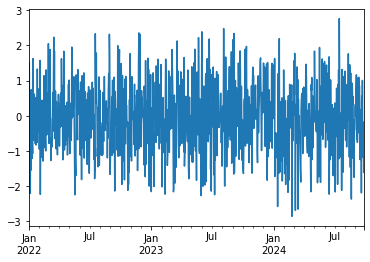

In [96]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2022", periods=1000))
ts.plot()

<AxesSubplot:>

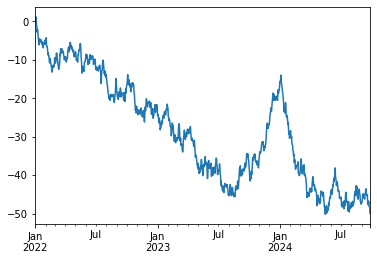

In [97]:
ts_cumsum = ts.cumsum()
ts_cumsum.plot()

If running under Jupyter Notebook, the plot will appear on `plot()`. Otherwise use `matplotlib.pyplot.show` to show it of `matplotlin.pyplot.savefig` to write it into a file.

In [98]:
plt.show()

On a DataFrame, the `plot()` method is a convenience to plot all of the columns with labels.

<Figure size 432x288 with 0 Axes>

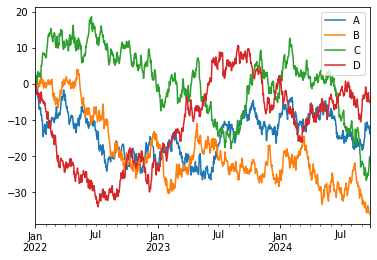

In [106]:
df = pd.DataFrame(
    np.random.randn(1000, 4),
    index=ts.index,
    columns=list("ABCD")
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

## Getting data in/out

### CSV

#### Writing to a .csv file

In [100]:
df.to_csv("files/foo.csv")

#### Reading from a .csv file

In [101]:
pd.read_csv("files/foo.csv")

,Unnamed: 0,A,B,C,D
0,2022-01-01,0.091463,1.673725,-0.746928,0.857382
1,2022-01-02,0.767879,2.172299,-1.809359,0.242449
2,2022-01-03,-0.188135,3.627265,-0.954293,0.558939
3,2022-01-04,-0.568480,3.282168,-2.156548,-0.169787
4,2022-01-05,-0.031601,1.061619,-3.950347,0.062531
...,...,...,...,...,...
995,2024-09-22,-15.264482,-29.471355,-21.530166,24.533283
996,2024-09-23,-14.416862,-29.069515,-22.524112,23.382795
997,2024-09-24,-14.521215,-28.743473,-21.557216,21.931433
998,2024-09-25,-15.213408,-28.746767,-19.732183,23.176940


### HDF5

Reading and writing to HDF5Stores.

#### Writing to a HDF5 Store.

In [102]:
# !pip install tables
df.to_hdf("files/foo.h5", "df")

#### Reading from HDF5 Store.

In [103]:
pd.read_hdf("files/foo.h5", "df")

,A,B,C,D
2022-01-01,0.091463,1.673725,-0.746928,0.857382
2022-01-02,0.767879,2.172299,-1.809359,0.242449
2022-01-03,-0.188135,3.627265,-0.954293,0.558939
2022-01-04,-0.568480,3.282168,-2.156548,-0.169787
2022-01-05,-0.031601,1.061619,-3.950347,0.062531
...,...,...,...,...
2024-09-22,-15.264482,-29.471355,-21.530166,24.533283
2024-09-23,-14.416862,-29.069515,-22.524112,23.382795
2024-09-24,-14.521215,-28.743473,-21.557216,21.931433
2024-09-25,-15.213408,-28.746767,-19.732183,23.176940


### Excel

Reading and writing to MS Excel.

#### Writing to an excel file

In [104]:
df.to_excel("files/foo.xlsx", sheet_name="Sheet1")

#### Reading from an excel file.

In [105]:
pd.read_excel("files/foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2022-01-01,0.091463,1.673725,-0.746928,0.857382
1,2022-01-02,0.767879,2.172299,-1.809359,0.242449
2,2022-01-03,-0.188135,3.627265,-0.954293,0.558939
3,2022-01-04,-0.568480,3.282168,-2.156548,-0.169787
4,2022-01-05,-0.031601,1.061619,-3.950347,0.062531
...,...,...,...,...,...
995,2024-09-22,-15.264482,-29.471355,-21.530166,24.533283
996,2024-09-23,-14.416862,-29.069515,-22.524112,23.382795
997,2024-09-24,-14.521215,-28.743473,-21.557216,21.931433
998,2024-09-25,-15.213408,-28.746767,-19.732183,23.176940
